-----------------------

# Question 1

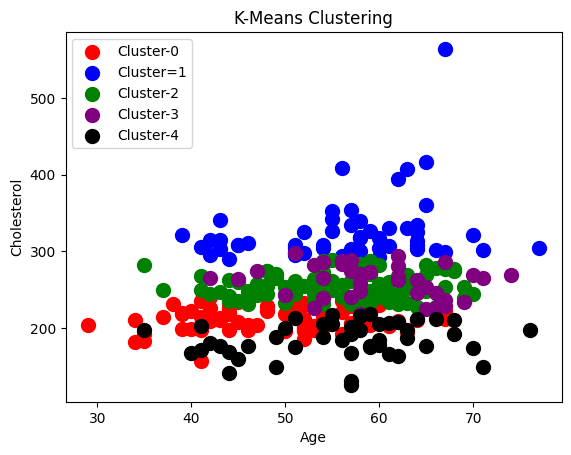

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("heart-disease-dataset.csv")

# Clean up any rows that have '?' as a value
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df.to_csv("cleaned_heart_disease_dataset.csv", index=False)

X = df.iloc[:, :].values

kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['cluster']=y_kmeans

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,4], s = 100, c = 'red', label = 'Cluster=0')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,4], s = 100, c = 'blue', label = 'Cluster=1')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,4], s = 100, c = 'green', label = 'Cluster=2')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,4], s = 100, c = 'purple', label = 'Cluster=3')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,4], s = 100, c = 'black', label = 'Cluster=4')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(loc='upper left')
plt.show()


-----------------------

# Question 2

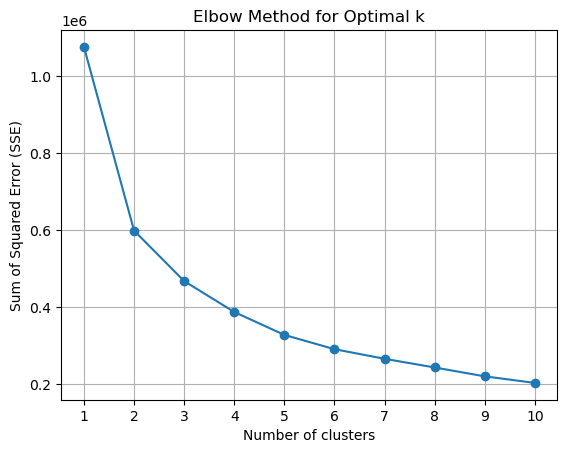

Elbow value: 3


In [2]:
from kneed import KneeLocator

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Calculate elbow value
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
elbow_value = kl.elbow
print("Elbow value:", elbow_value)

## The estimated elbow value is 3. 

--------------------------

# Question 3

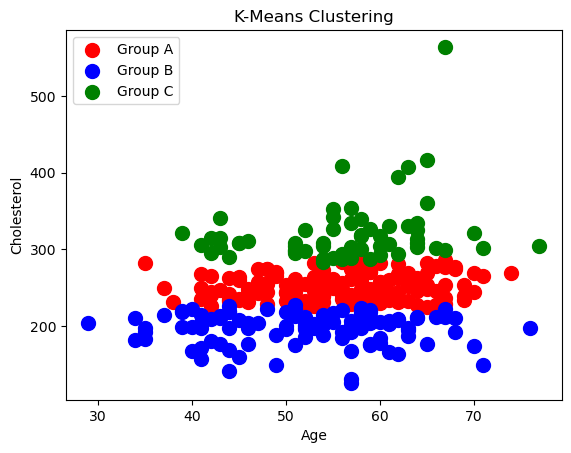

In [3]:
kmeans = KMeans(n_clusters=elbow_value, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['cluster']=y_kmeans

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,4], s = 100, c = 'red', label = 'Group A')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,4], s = 100, c = 'blue', label = 'Group B')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,4], s = 100, c = 'green', label = 'Group C')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(loc='upper left')
plt.show()

----------------------------

# Question 4

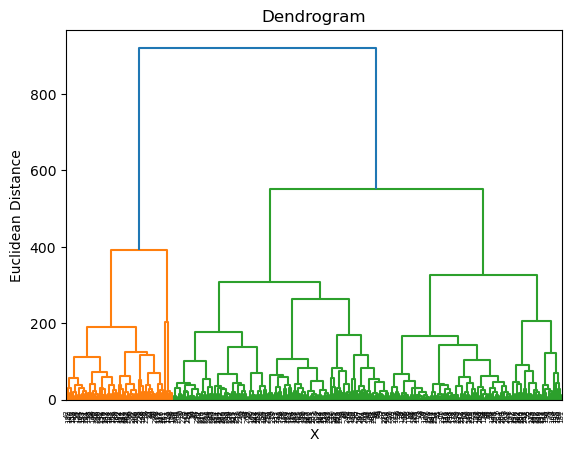

In [4]:
from scipy.cluster import hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Euclidean Distance')
plt.show()

------------------------------

# Question 5

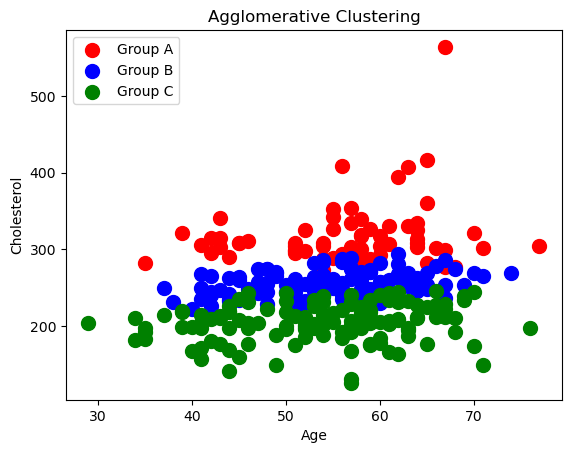

In [5]:
from sklearn.cluster import AgglomerativeClustering as ac

hc = ac(n_clusters=elbow_value, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,4], s = 100, c = 'red', label = 'Group A')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,4], s = 100, c = 'blue', label = 'Group B')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,4], s = 100, c = 'green', label = 'Group C')
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(loc='upper left')
plt.show()

-----------------------

# Question 6

In [6]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X, y_kmeans)
silhouette_agglomerative = silhouette_score(X, y_hc)

print('K-Means silhouette score:', silhouette_kmeans)
print('Agglomerative silhouette score: ', silhouette_agglomerative)

K-Means silhouette score: 0.2830827493938397
Agglomerative silhouette score:  0.23920063180177092


### The K-means clustering silhouette score is 0.283. 

### The Agglomerative clustering silhouette score is 0.239. 

### 0.283 > 0.239

## Thus, the K-means clustering is better for this dataset. 

-------------------------------